Test with a mnist dataset for the models. 

Import the models and the detaset

In [1]:
import Model
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(tf.__version__)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


See the dataset information

(60000, 28, 28)


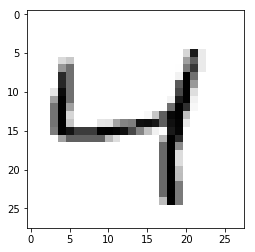

(60000,)
4
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt

print(x_train.shape)

plt.imshow(x_train[2], cmap='Greys')
plt.show()

print(y_train.shape)

print(y_train[2])

#Reshepe the vector for the network

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Create the attention model

In [ ]:
attentionModel = Model.AttentionModel(10, x_train.shape[1], x_train.shape[2], use_GRU=True)
attentionModel.summary()

Fit the attention model.

In [ ]:
attentionModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#results = attentionModel.fit(x = x_train, y = y_train, batch_size = 32, epochs = 1, use_multiprocessing = True, workers = 4)

Now test the network

In [ ]:
attentionModel.evaluate(x_test, y_test)

Now try to predict

In [ ]:
pred = attentionModel.predict(x_test[1234].reshape(1, 28, 28, 1))
print(pred.argmax())
print(y_test[1234])

Now try to train the LSTM Autoencoder 

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# error here but i don't know why

AE = Model.AE(10, 28, 28, use_GRU=True)
AE.summary()

We need to create a replica of the input for the decoder input

In [ ]:
print(x_train[25])
print(x_train.shape)
x_train_2 = np.delete(x_train,0,2)
print(x_train_2.shape)
print(x_train_2[25])
x_train_3 = np.insert(x_train_2, 0, values=0, axis=2)
print(x_train_3.shape)
print(x_train[25])
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Run training
AE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
AE.fit([x_train_noisy, x_train_3], x_train,
          batch_size=32,
          epochs=1)

Try to save the weights of the model

In [ ]:
# Save weights of the model
# Work only for LSTM
#LSTM_Ae.save_weights('prova.h5')
#LSTM_Ae.load_weights('Weight_test/prova.h5')

Now I need to transfer the weight of the autoencoder to the encoder only and create a FCNN to predict

In [ ]:
AE_Encoder = Model.AE_Encoder(10, x_train.shape[1], x_train.shape[2], use_GRU=True)
AE_Encoder.summary()

#print(LSTM_Ae.layers[3])
"""
weights = LSTM_Ae.layers[1].get_weights()
LSTM_Encoder.layers[1].set_weights(weights)
weights = LSTM_Ae.layers[2].get_weights()
LSTM_Encoder.layers[2].set_weights(weights)
weights = LSTM_Ae.layers[3].get_weights()
LSTM_Encoder.layers[3].set_weights(weights)
weights = LSTM_Ae.layers[4].get_weights()
LSTM_Encoder.layers[4].set_weights(weights)
weights = LSTM_Ae.layers[5].get_weights()
LSTM_Encoder.layers[5].set_weights(weights)
"""
#print(weights)

Create the classifier

In [ ]:
from tensorflow.keras import layers, models

#We need to cahnge this part because if we use gru we have as input 32 elements
classifier = models.Sequential()
classifier.add(layers.Dense(64, activation='relu', input_shape=(64, )))
classifier.add(layers.Dense(32, activation='relu'))
classifier.add(layers.Dense(10, activation='softmax'))

classifier.summary()

Now try a encode an image with the encoder

In [ ]:
encoding = AE_Encoder.predict(x_train)

print(encoding.shape)
print(y_train.shape)
print(encoding[504])

Now we can train the classifier with the encode word

In [ ]:
classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classifier.fit(x = encoding, y = y_train, batch_size = 32, epochs = 5)

In [ ]:
code = AE_Encoder.predict(x_test)
pred = classifier.evaluate(code, y_test)
print(pred)
print(y_test[40])

Now a test on the CNN - RNN Autoencoder in the same manner of the previous autoencoder

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

S2S, enc = Model.Seq2SeqModel(10, x_train.shape[1], x_train.shape[2], use_GRU=True)
S2S.summary()

W0704 11:23:56.223180 140151701497600 deprecation.py:506] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 11:23:56.509634 140151701497600 deprecation.py:506] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 11:23:56.512850 140151701497600 deprecation.py:506] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensor

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 5)    30          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 5)    20          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 1)    26          batch_normalization[0][0]        
______________________________________________________________________________________________

In [4]:
#print(x_train[25])
print(x_train.shape)
x_train_2 = np.delete(x_train,0,2)
print(x_train_2.shape)
#print(x_train_2[25])
x_train_3 = np.insert(x_train_2, 0, values=0, axis=2)
print(x_train_3.shape)
#print(x_train[25])
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(60000, 28, 28)
(60000, 28, 27)
(60000, 28, 28)


In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train_noisy = x_train_noisy.reshape(x_train.shape[0], 28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train_noisy = x_train_noisy.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

S2S.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
S2S.fit(x_train_noisy, x_train,
          batch_size=32,
          epochs=1)

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


W0704 11:24:34.752505 140151701497600 deprecation.py:323] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


InvalidArgumentError: Expected size[0] in [0, 0], but got 32
	 [[{{node remove_last_column/Slice}}]]

In [ ]:
# Save weights of the model
#This part work only for the LSTM part, because the two network are different
#S2S.save_weights('Weight_test/provaS2S.h5')
#S2S.load_weights('provaS2S.h5')

In [ ]:
S2S_Encoder = Model.Seq2SeqModel_Encoder(10, x_train.shape[1], x_train.shape[2], use_GRU=True)
S2S_Encoder.summary()
""" this part work only for LSTM, not tested the gru version
weights = S2S.layers[2].get_weights()
S2S_Encoder.layers[2].set_weights(weights)
weights = S2S.layers[3].get_weights()
S2S_Encoder.layers[3].set_weights(weights)
weights = S2S.layers[4].get_weights()
S2S_Encoder.layers[4].set_weights(weights)
weights = S2S.layers[5].get_weights()
S2S_Encoder.layers[5].set_weights(weights)
weights = S2S.layers[7].get_weights()
S2S_Encoder.layers[7].set_weights(weights)
weights = S2S.layers[8].get_weights()
S2S_Encoder.layers[8].set_weights(weights)
weights = S2S.layers[9].get_weights()
S2S_Encoder.layers[9].set_weights(weights)
weights = S2S.layers[10].get_weights()
S2S_Encoder.layers[10].set_weights(weights)
weights = S2S.layers[11].get_weights()
S2S_Encoder.layers[11].set_weights(weights)
weights = S2S.layers[12].get_weights()
S2S_Encoder.layers[12].set_weights(weights)
"""

In [ ]:
#We need to cahnge this part because if we use gru we have as input 32 elements
classifier2 = models.Sequential()
classifier2.add(layers.Dense(64, activation='relu', input_shape=(64, )))
classifier2.add(layers.Dense(48, activation='relu'))
classifier2.add(layers.Dense(32, activation='relu'))
classifier2.add(layers.Dense(10, activation='softmax'))

classifier2.summary()

In [ ]:
encoding = S2S_Encoder.predict(x_train)

print(encoding.shape)
print(y_train.shape)
print(encoding[504])

In [ ]:
classifier2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classifier2.fit(x = encoding, y = y_train, batch_size = 128, epochs = 10)

In [ ]:
code = S2S_Encoder.predict(x_test)
bo = classifier2.evaluate(code, y_test)
print(bo) #this is the cost function 
print(code[40].shape)
test = classifier2.predict(code[5555].reshape(1, 64))
print(test.argmax())
print(y_test[5555])